# <b>Assignment : DT</b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

In [4]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 1.1 Loading Data

In [5]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessed_data.csv')

In [6]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
df0 = data[data['project_is_approved']==0]
df1 = data[data['project_is_approved']==1]
df1 = df1.iloc[:35000,:]
data = pd.concat([df1,df0])
print(data.shape)
print(data['project_is_approved'].value_counts())

(51542, 9)
1    35000
0    16542
Name: project_is_approved, dtype: int64


In [8]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [9]:
#Calculating the polarity score of essay column
from tqdm import tqdm
negative = []
positive = []
neutral = []
compound = []
for i in tqdm(data['essay']):
    n = sid.polarity_scores(i)['neg']
    p = sid.polarity_scores(i)['pos']
    nu = sid.polarity_scores(i)['neu']
    c = sid.polarity_scores(i)['compound']
    negative.append(n)
    positive.append(p)
    neutral.append(nu)
    compound.append(c)

100%|██████████| 51542/51542 [07:18<00:00, 117.42it/s]


In [10]:
# adding polarity scores to the dataframe
data['negative']=negative
data["positive"]=positive
data["neutral"]=neutral
data["compound"]=compound

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51542 entries, 0 to 109199
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   school_state                                  51542 non-null  object 
 1   teacher_prefix                                51542 non-null  object 
 2   project_grade_category                        51542 non-null  object 
 3   teacher_number_of_previously_posted_projects  51542 non-null  int64  
 4   project_is_approved                           51542 non-null  int64  
 5   clean_categories                              51542 non-null  object 
 6   clean_subcategories                           51542 non-null  object 
 7   essay                                         51542 non-null  object 
 8   price                                         51542 non-null  float64
 9   negative                                      51542 non-null

In [12]:
data.shape

(51542, 13)

In [13]:
# features and target variable
X = data.drop('project_is_approved',axis = 1)
Y = data['project_is_approved']
# Splitting the features to train and test
Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size = 0.2,stratify = Y)
print("train shape:",Xtr.shape,Ytr.shape)
print("test shape:",Xts.shape,Yts.shape)

train shape: (41233, 12) (41233,)
test shape: (10309, 12) (10309,)


## Categorical encoding

In [14]:
# one hot encoding of all the categorical features using binary BOW
columns = ['school_state', 'teacher_prefix', 'project_grade_category','clean_categories', 'clean_subcategories']
cat_enc_tr = [] # to store train data vectors
cat_enc_ts = [] # to store test data vectors
for feature in columns:
    enc = CountVectorizer(binary = True)
    x_bow = enc.fit_transform(Xtr[feature].values)
    x_bow_ts = enc.transform(Xts[feature].values)
    print("{} enc_details:{} \n feature names:{}\n".format(feature,(x_bow.shape,x_bow_ts.shape),enc.get_feature_names()))
    cat_enc_tr.append(x_bow)
    cat_enc_ts.append(x_bow_ts)

school_state enc_details:((41233, 51), (10309, 51)) 
 feature names:['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']

teacher_prefix enc_details:((41233, 5), (10309, 5)) 
 feature names:['dr', 'mr', 'mrs', 'ms', 'teacher']

project_grade_category enc_details:((41233, 4), (10309, 4)) 
 feature names:['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']

clean_categories enc_details:((41233, 9), (10309, 9)) 
 feature names:['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']

clean_subcategories enc_details:((41233, 30), (10309, 30)) 
 feature names:['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_

## Price Standardaization

In [15]:
from sklearn.preprocessing import Normalizer
# Normalizing numerical features
norm = Normalizer()
#Price normalization
x_price =  norm.fit_transform(Xtr['price'].values.reshape(-1,1))
x_price_ts = norm.transform(Xts['price'].values.reshape(-1,1))

In [16]:
# teacher_number_of_previously_posted_projects normalization
x_pre_proj =  norm.fit_transform(Xtr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_pre_proj_ts = norm.transform(Xts['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

## Tfidf of essay & Tfidf_weighted_W2V of essay

In [17]:
#TFIDF vectorization of essay column
vec1 = TfidfVectorizer(max_df = 10,ngram_range = (1,3),max_features = 5000)
vec1.fit(Xtr['essay'].values)
X_tr_tfidf = vec1.transform(Xtr['essay'].values)#Tfidf on train essay
X_ts_tfidf = vec1.transform(Xts['essay'].values)# Tfidf on test essay
print(X_tr_tfidf.shape)
print(X_ts_tfidf.shape)

(41233, 5000)
(10309, 5000)


In [18]:
vec = TfidfVectorizer(max_df = 10)
vec.fit(Xtr['essay'].values)

TfidfVectorizer(max_df=10)

In [19]:
dictionary = dict(zip(vec.get_feature_names_out(), list(vec.idf_)))
tfidf_words = set(vec.get_feature_names_out())

In [20]:
import pickle
from tqdm import tqdm
import os

with open('/content/drive/MyDrive/Colab Notebooks/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [21]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(Xtr['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 41233/41233 [00:04<00:00, 8600.90it/s]

41233
300


In [22]:
tfidf_w2v_vectors_ts = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(Xts['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_ts.append(vector)

print(len(tfidf_w2v_vectors_ts))
print(len(tfidf_w2v_vectors_ts[0]))

100%|██████████| 10309/10309 [00:01<00:00, 9566.98it/s]

10309
300


In [23]:
# Converting tfidf W2V vectors of list to numpy array
tfidf_w2v_vectors_ts = np.array(tfidf_w2v_vectors_ts)
tfidf_w2v_vectors = np.array(tfidf_w2v_vectors)
print(tfidf_w2v_vectors.shape)
print(tfidf_w2v_vectors_ts.shape)

(41233, 300)
(10309, 300)


## Implementation of DecisionTree

### set-1(Tfidf)

In [24]:
from scipy.sparse import hstack
# Stacking all the encoded features to form xtrain and xtest
xtrain1 = hstack((hstack(cat_enc_tr),x_price,x_pre_proj,X_tr_tfidf,Xtr['positive'].values.reshape(-1,1),
                 Xtr['negative'].values.reshape(-1,1),Xtr['neutral'].values.reshape(-1,1),Xtr['compound'].values.reshape(-1,1))).tocsr()
xtest1 = hstack((hstack(cat_enc_ts),x_price_ts,x_pre_proj_ts,X_ts_tfidf,Xts['positive'].values.reshape(-1,1),
                Xts['negative'].values.reshape(-1,1),Xts['neutral'].values.reshape(-1,1),Xts['compound'].values.reshape(-1,1))).tocsr()
print(xtrain1.shape)
print(xtest1.shape)

(41233, 5105)
(10309, 5105)


In [25]:
# CrossValidation
tree_clf = DecisionTreeClassifier(random_state = 0)
params = {
    'max_depth':[1, 3, 10, 30],
    'min_samples_split':[5, 10, 100, 500]
}
CV = GridSearchCV(tree_clf,params,cv = 3,scoring = 'roc_auc',return_train_score = True)

CV.fit(xtrain1,Ytr)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [26]:
# creating a dataframe using CV results obtained above and sorting them based on alpha
results = pd.DataFrame.from_dict(CV.cv_results_)
results = results.sort_values(['param_max_depth'])

# Initializing below columns to varible names
train_auc= results['mean_train_score']
depth= results['param_max_depth']
cv_auc = results['mean_test_score'] 
splits =  results['param_min_samples_split']

In [27]:
import plotly.offline as offline
import plotly.graph_objs as go
#offline.init_notebook_mode()

In [28]:
# 3D plot
trace1 = go.Scatter3d(x=depth,y=splits,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=depth,y=splits,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_splits'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
#offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()

Best parameters:
* max_depth=30
* min_sample_split=100

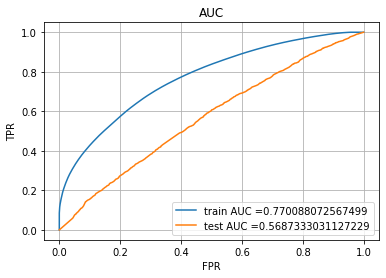

Train Accuracy:  0.6897873062838018
Test Accuracy:  0.566495295372975


In [29]:
# Fitting the model using the best parameters
clf = DecisionTreeClassifier(max_depth = 30,min_samples_split=100,random_state = 0,class_weight = 'balanced')

clf.fit(xtrain1,Ytr)
# Predicting the probability scores
ytr_prob=clf.predict_proba(xtrain1)[:,1]
yts_prob=clf.predict_proba(xtest1)[:,1]

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(Ytr, ytr_prob)
test_fpr, test_tpr, te_thresholds = roc_curve(Yts, yts_prob)

# Plotting ROC-AUC curve
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()
print("Train Accuracy: ",accuracy_score(Ytr,clf.predict(xtrain1)))
print("Test Accuracy: ",accuracy_score(Yts,clf.predict(xtest1)))

In [30]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.48282305599637265 for threshold 0.497
Confusion Matrix of Train data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


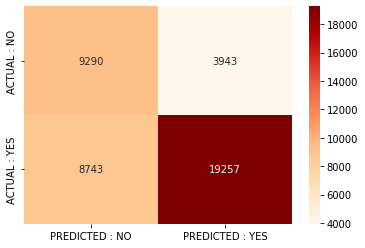

In [31]:
best_thresh = best_threshold(tr_thresholds,train_fpr,train_tpr)
# Confusion matrix for train data
cm_tr=confusion_matrix(Ytr,predict_with_best_t(ytr_prob,best_thresh))
# Using heatmap to display confusion matrix
print("Confusion Matrix of Train data: \n",sns.heatmap(cm_tr,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot=True,fmt="d",cmap='OrRd'))

Confusion Matrix of Train data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


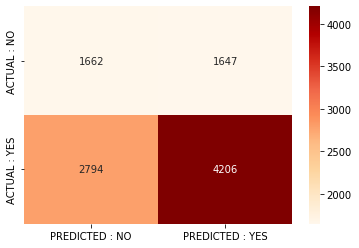

In [32]:
# Confusion matrix for train data
cm_ts=confusion_matrix(Yts,predict_with_best_t(yts_prob,best_thresh))
# Using heatmap to display confusion matrix
print("Confusion Matrix of Train data: \n",sns.heatmap(cm_ts,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot=True,fmt="d",cmap='OrRd'))

#### FalsePositives

In [33]:
# Calculating the ids of false positives in test data
n = Yts.shape[0]
y_pred = clf.predict(xtest1)
fpidx = [] # to store ids
fpcnt = 0 # for counting number of false positives
for i in range(n):
    if Yts.values[i]==0 and y_pred[i]==1:
        fpidx.append(i)
        fpcnt +=1
    else:
        continue

print(confusion_matrix(Yts,y_pred))        
fpcnt

[[1691 1618]
 [2851 4149]]


1618

In [34]:
fp_data = Xts.iloc[fpidx,:]
fp_data.shape

(1618, 12)

* Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`
* Plot the box plot with the `price` of these `false positive data points`
* Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

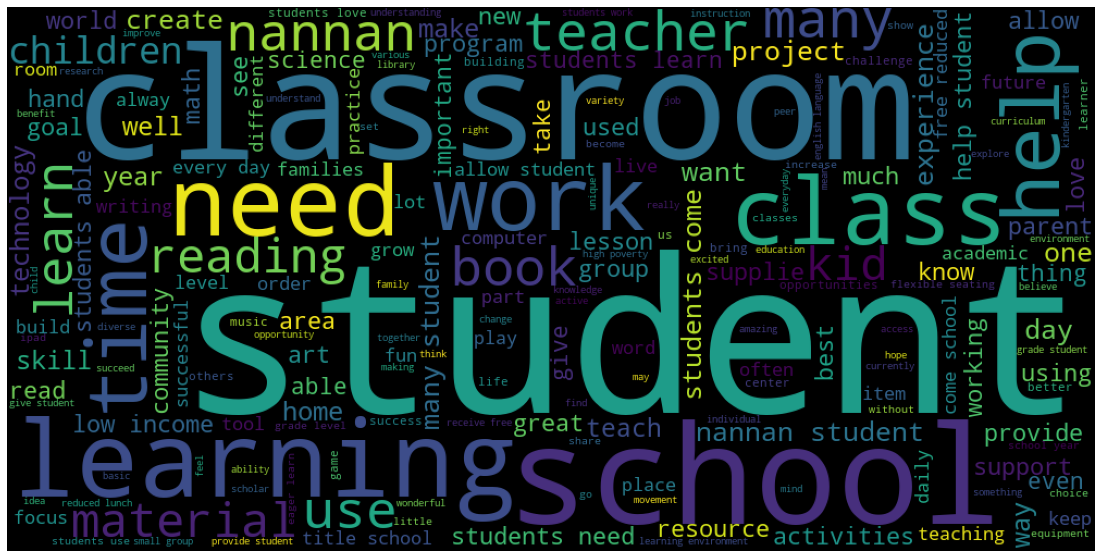

In [35]:
lst = list(fp_data['essay'].values)
combined_essay = " ".join(lst)
# wordcloud for essay column of fp data
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords).generate(combined_essay)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

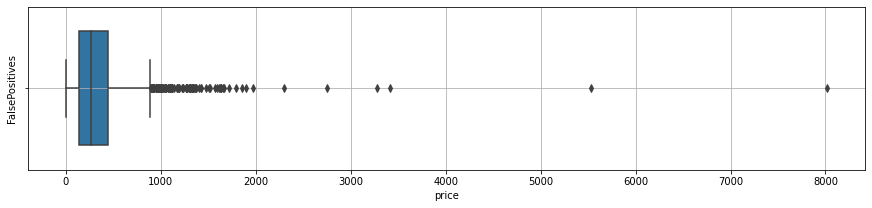

In [36]:
# boxplot for price column of fp data
plt.figure(figsize=(15,3))
sns.boxplot(fp_data['price'],width = 0.7)
plt.grid()
plt.ylabel('FalsePositives')
plt.show()

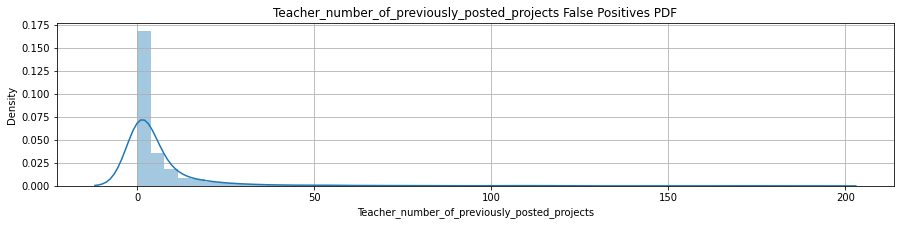

In [37]:
# pdf of teacher_number_of_previously_posted_projects on fp data
plt.figure(figsize=(15,3))
sns.distplot(fp_data['teacher_number_of_previously_posted_projects'])
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.grid()
plt.show()

### Set-2 (Tfidf-W2V)

In [38]:
# Stacking all the encoded features to form xtrain and xtest
xtrain = hstack((hstack(cat_enc_tr),x_price,x_pre_proj,tfidf_w2v_vectors,Xtr['positive'].values.reshape(-1,1),
                 Xtr['negative'].values.reshape(-1,1),Xtr['neutral'].values.reshape(-1,1),Xtr['compound'].values.reshape(-1,1))).tocsr()
xtest = hstack((hstack(cat_enc_ts),x_price_ts,x_pre_proj_ts,tfidf_w2v_vectors_ts,Xts['positive'].values.reshape(-1,1),
                Xts['negative'].values.reshape(-1,1),Xts['neutral'].values.reshape(-1,1),Xts['compound'].values.reshape(-1,1))).tocsr()
print(xtrain.shape)
print(xtest.shape)

(41233, 405)
(10309, 405)


In [39]:
# CrossValidation
tree_clf = DecisionTreeClassifier(random_state = 0)
params = {
    'max_depth':[1, 3, 10, 30],
    'min_samples_split':[5, 10, 100, 500]
}
CV = GridSearchCV(tree_clf,params,cv = 3,scoring = 'roc_auc',return_train_score = True)

CV.fit(xtrain,Ytr)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [40]:
# creating a dataframe using CV results obtained above and sorting them based on alpha
results = pd.DataFrame.from_dict(CV.cv_results_)
results = results.sort_values(['param_max_depth'])

# Initializing below colums to varible names
train_auc= results['mean_train_score']
depth= results['param_max_depth']
cv_auc = results['mean_test_score'] 
splits =  results['param_min_samples_split']

In [41]:
# 3D plot
trace1 = go.Scatter3d(x=depth,y=splits,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=depth,y=splits,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_splits'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
#offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()

Best Parameters:
* max_depth=30
* min_sample_split=100

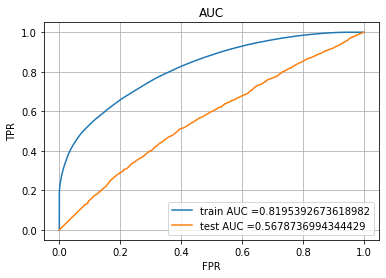

Train Accuracy:  0.7618897485024131
Test Accuracy:  0.6234358327674847


In [42]:
clf = DecisionTreeClassifier(max_depth = 30,min_samples_split=100,random_state = 0)

clf.fit(xtrain,Ytr)

ytr_prob=clf.predict_proba(xtrain)[:,1]
yts_prob=clf.predict_proba(xtest)[:,1]

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(Ytr, ytr_prob)
test_fpr, test_tpr, te_thresholds = roc_curve(Yts, yts_prob)

# Plotting ROC-AUC curve
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()
print("Train Accuracy: ",accuracy_score(Ytr,clf.predict(xtrain)))
print("Test Accuracy: ",accuracy_score(Yts,clf.predict(xtest)))

the maximum value of tpr*(1-fpr) 0.5296487946799667 for threshold 0.667
Confusion Matrix of Train data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


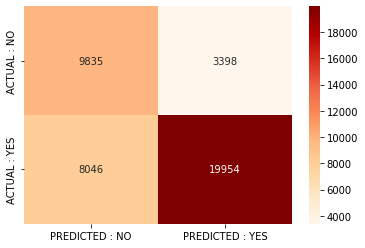

In [43]:
best_thresh = best_threshold(tr_thresholds,train_fpr,train_tpr)
# Confusion matrix for train data
cm_tr=confusion_matrix(Ytr,predict_with_best_t(ytr_prob,best_thresh))
# Using heatmap to display confusion matrix
print("Confusion Matrix of Train data: \n",sns.heatmap(cm_tr,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot=True,fmt="d",cmap='OrRd'))

Confusion Matrix of Train data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


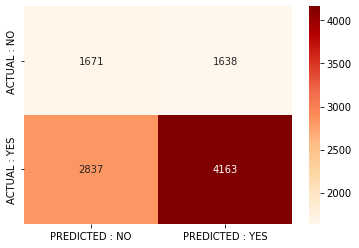

In [44]:
# Confusion matrix for train data
cm_ts=confusion_matrix(Yts,predict_with_best_t(yts_prob,best_thresh))
# Using heatmap to display confusion matrix
print("Confusion Matrix of Train data: \n",sns.heatmap(cm_ts,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot=True,fmt="d",cmap='OrRd'))

#### FalsePositives

In [45]:
# Calculating the ids of false positives in test data
n = Yts.shape[0]
y_pred = clf.predict(xtest)
fpidx = []# to store ids
fpcnt = 0# for counting number of false positives
for i in range(n):
    if Yts.values[i]==0 and y_pred[i]==1:
        fpidx.append(i)
        fpcnt +=1
    else:
        continue

print(confusion_matrix(Yts,y_pred))        
fpcnt

[[ 917 2392]
 [1490 5510]]


2392

In [46]:
fp_data = Xts.iloc[fpidx,:]
fp_data.shape

(2392, 12)

* Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`
* Plot the box plot with the `price` of these `false positive data points`
* Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

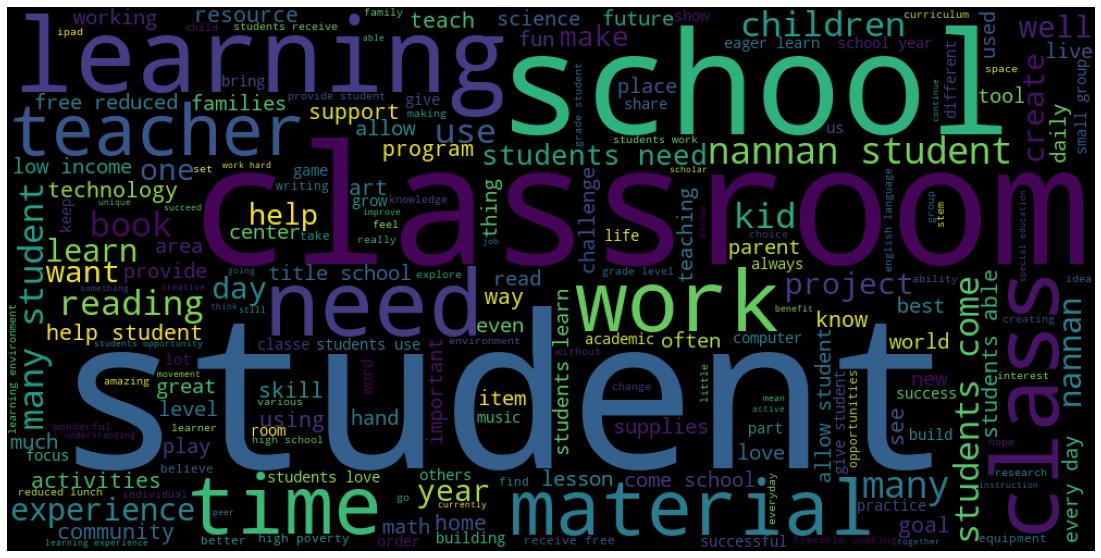

In [47]:
lst = list(fp_data['essay'].values)
combined_essay = " ".join(lst)

from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1000, height = 500,stopwords = stopwords).generate(combined_essay)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

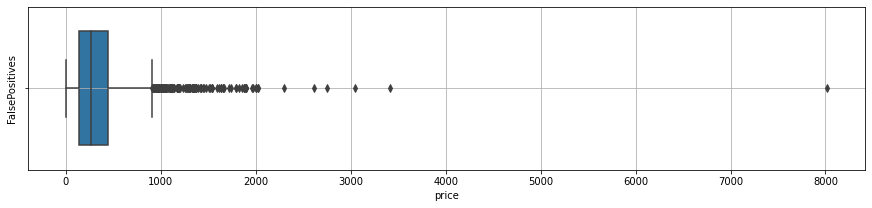

In [48]:
plt.figure(figsize=(15,3))
sns.boxplot(fp_data['price'],width = 0.7)
plt.grid()
plt.ylabel('FalsePositives')
plt.show()

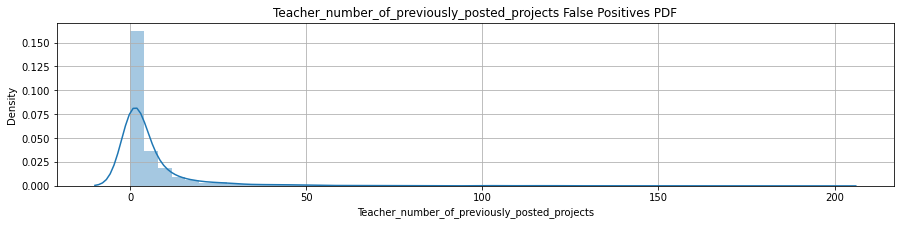

In [49]:
plt.figure(figsize=(15,3))
sns.distplot(fp_data['teacher_number_of_previously_posted_projects'])
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.grid()
plt.show()

# <font color='red'> <b>Task - 2</b></font>

In [50]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.
dtclf = DecisionTreeClassifier(min_samples_split=100)
dtclf.fit(xtrain1,Ytr)

DecisionTreeClassifier(min_samples_split=100)

In [51]:
# Identifying the nonzero important features 
imp_id = np.nonzero(dtclf.feature_importances_)[0]
imp_id.shape

(1072,)

In [52]:
# converting sparse to dense matrix
newxtr = xtrain1.todense()
newxts = xtest1.todense()

In [53]:
trainX = np.asarray(newxtr[:,imp_id])
testX = np.asarray(newxts[:,imp_id])
print(trainX.shape)
print(testX.shape)

(41233, 1072)
(10309, 1072)


In [54]:
#Cross validation using logistic regression on important features
from sklearn.linear_model import LogisticRegression
params = {'C':[0.001,0.01,0.1,1,10,100]}
CV = GridSearchCV(LogisticRegression(),params,cv = 3,scoring = 'roc_auc',verbose = 2,return_train_score = True)

CV.fit(trainX,Ytr)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ............................................C=0.001; total time=   1.0s
[CV] END ............................................C=0.001; total time=   0.9s
[CV] END ............................................C=0.001; total time=   1.2s
[CV] END .............................................C=0.01; total time=   2.4s
[CV] END .............................................C=0.01; total time=   2.5s
[CV] END .............................................C=0.01; total time=   2.6s
[CV] END ..............................................C=0.1; total time=   5.7s
[CV] END ..............................................C=0.1; total time=   5.6s
[CV] END ..............................................C=0.1; total time=   5.1s
[CV] END ................................................C=1; total time=   5.3s
[CV] END ................................................C=1; total time=   6.0s
[CV] END ........................................

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [55]:
# creating a dataframe using CV results obtained above and sorting them based on alpha
results = pd.DataFrame.from_dict(CV.cv_results_)
results = results.sort_values(['param_C'])

# Initializing below colums to varible names
train_auc= results['mean_train_score']
C = results['param_C']
cv_auc = results['mean_test_score'] 

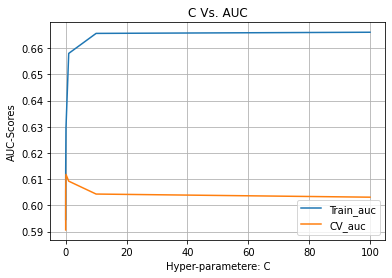

In [57]:
plt.plot(C,train_auc,label = 'Train_auc')
plt.plot(C,cv_auc,label='CV_auc')
plt.xlabel('Hyper-parametere: C')
plt.ylabel('AUC-Scores')
plt.title('C Vs. AUC')
plt.grid()
plt.legend()
plt.show()

In [58]:
best = CV.best_params_
best

{'C': 0.1}

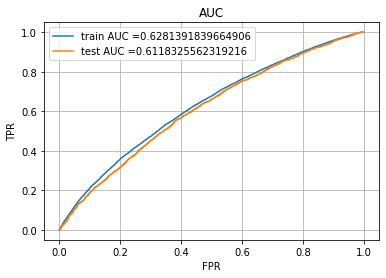

Train Accuracy:  0.6831663958479859
Test Accuracy:  0.68115239111456


In [59]:
clf = LogisticRegression(C = best['C'],random_state = 0)

clf.fit(trainX,Ytr)

ytr_prob=clf.predict_proba(trainX)[:,1]
yts_prob=clf.predict_proba(testX)[:,1]

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(Ytr, ytr_prob)
test_fpr, test_tpr, te_thresholds = roc_curve(Yts, yts_prob)

# Plotting ROC-AUC curve
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()
print("Train Accuracy: ",accuracy_score(Ytr,clf.predict(trainX)))
print("Test Accuracy: ",accuracy_score(Yts,clf.predict(testX)))

the maximum value of tpr*(1-fpr) 0.35129180565901263 for threshold 0.678
Confusion Matrix of Train data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


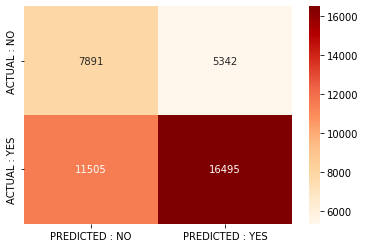

In [60]:
best_thresh = best_threshold(tr_thresholds,train_fpr,train_tpr)
# Confusion matrix for train data
cm_tr=confusion_matrix(Ytr,predict_with_best_t(ytr_prob,best_thresh))
# Using heatmap to display confusion matrix
print("Confusion Matrix of Train data: \n",sns.heatmap(cm_tr,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot=True,fmt="d",cmap='OrRd'))

Confusion Matrix of Train data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


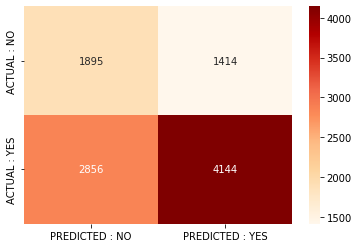

In [61]:
# Confusion matrix for train data
cm_ts=confusion_matrix(Yts,predict_with_best_t(yts_prob,best_thresh))
# Using heatmap to display confusion matrix
print("Confusion Matrix of Train data: \n",sns.heatmap(cm_ts,xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot=True,fmt="d",cmap='OrRd'))

# Summary

In [1]:
from prettytable import PrettyTable
x = PrettyTable(['Vectorizer','Model','Hyper-Parameter','AUC','Accuracy'])
x.add_rows([
    ['TFIDF-Train','DecisionTree','max-depth: 30 |min-samples-split: 100',0.7713,'67.9%'],
    ['TFIDF-Test','DecisionTree','max-depth: 30 |min-samples-split: 100',0.5830,'56.4%'],
    ['TFIDF-W2V-Train','DecisionTree','max-depth: 30 |min-samples-split: 100',0.8148,'76%'],
    ['TFIDF-W2V-Test','DecisionTree','max-depth: 30 |min-samples-split: 100',0.5507,'61.2%'],
    ['TFIDF-Train','SVM',"C: 0.1",0.6235,'68.3%'],
    ['TFIDF-Test','SVM',"C: 0.1",0.6203,'68.1%']
])
print(x)

+-----------------+--------------+---------------------------------------+--------+----------+
|    Vectorizer   |    Model     |            Hyper-Parameter            |  AUC   | Accuracy |
+-----------------+--------------+---------------------------------------+--------+----------+
|   TFIDF-Train   | DecisionTree | max-depth: 30 |min-samples-split: 100 | 0.7713 |  67.9%   |
|    TFIDF-Test   | DecisionTree | max-depth: 30 |min-samples-split: 100 | 0.583  |  56.4%   |
| TFIDF-W2V-Train | DecisionTree | max-depth: 30 |min-samples-split: 100 | 0.8148 |   76%    |
|  TFIDF-W2V-Test | DecisionTree | max-depth: 30 |min-samples-split: 100 | 0.5507 |  61.2%   |
|   TFIDF-Train   |     SVM      |                 C: 0.1                | 0.6235 |  68.3%   |
|    TFIDF-Test   |     SVM      |                 C: 0.1                | 0.6203 |  68.1%   |
+-----------------+--------------+---------------------------------------+--------+----------+
